<a href="https://colab.research.google.com/github/CallSohail/Text-Emotion-Gap/blob/main/Multi_Label_Emotion_Classification_in_Text_Using_XLM_Roberta_for_African_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries and Loading Data**

In [ ]:
# Importing Libraries and Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/public_data_dev/track_a/train/afr.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
data.head()

,id,text,anger,disgust,fear,joy,sadness
0,afr_train_track_a_00001,Die grondeienaars het die departement genader ...,0,0,0,0,0
1,afr_train_track_a_00002,Dit is verder 'n erkende feit dat daar menings...,0,0,0,0,0
2,afr_train_track_a_00003,Baie families in die Wes-Kaap is in rou gedomp...,0,0,0,0,1
3,afr_train_track_a_00004,Ons wil u deelmaak van die werk wat ons doen.,0,0,0,1,0
4,afr_train_track_a_00005,En dit onderstreep waarom NALN en NELM gesamen...,0,0,0,1,0


In [ ]:
# Display basic information
print("Dataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1222 non-null   object
 1   text     1222 non-null   object
 2   anger    1222 non-null   int64 
 3   disgust  1222 non-null   int64 
 4   fear     1222 non-null   int64 
 5   joy      1222 non-null   int64 
 6   sadness  1222 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 67.0+ KB
None


In [ ]:
numerical_columns = ["anger", "disgust","fear",	"joy","sadness"]

In [ ]:
# Missing values percentage
missing_values = data.isnull().sum()
print("\nMissing Values (in Percentage):")
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage)


Missing Values (in Percentage):
id         0.0
text       0.0
anger      0.0
disgust    0.0
fear       0.0
joy        0.0
sadness    0.0
dtype: float64


In [ ]:
    # # Boxplot for outliers
    # for col in numerical_columns:
    #     plt.figure(figsize=(8, 5))
    #     sns.boxplot(x=data[col], palette="Set2")
    #     plt.title(f"Boxplot of {col}")
    #     plt.xlabel(col)
    #     plt.show()

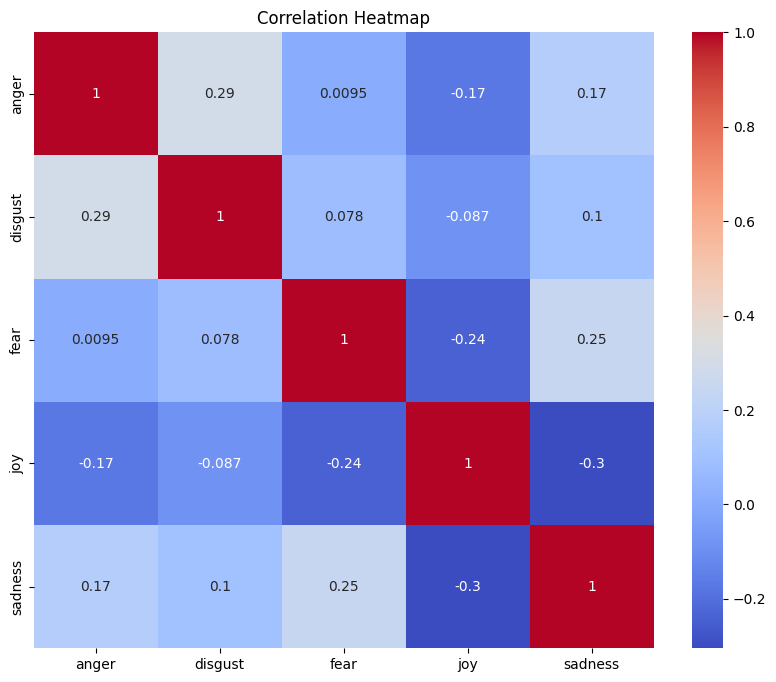

In [ ]:
# 3. Correlation Heatmap (for numerical data)
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Count the number of non-zero entries for each emotion (i.e., rows where the emotion is present)
emotion_counts = data[numerical_columns].sum()

# Display the counts
print(emotion_counts)


anger       44
disgust     12
fear       121
joy        531
sadness    177
dtype: int64


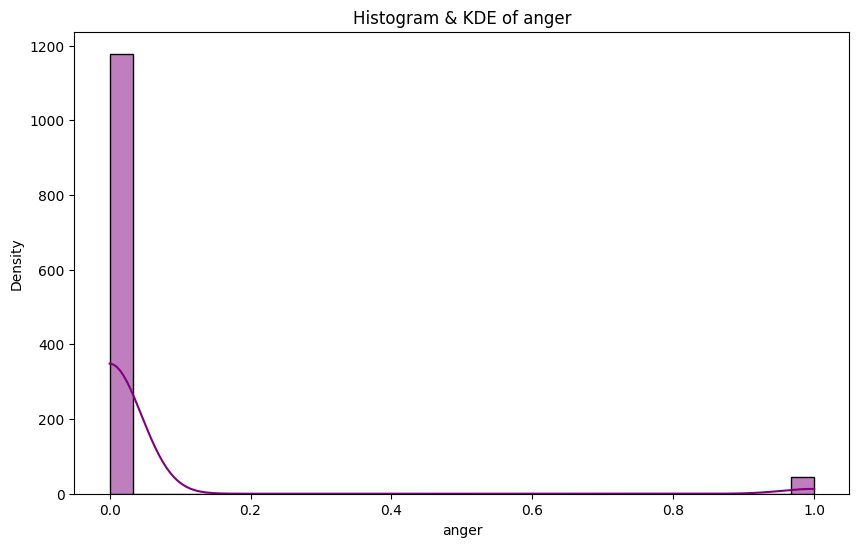

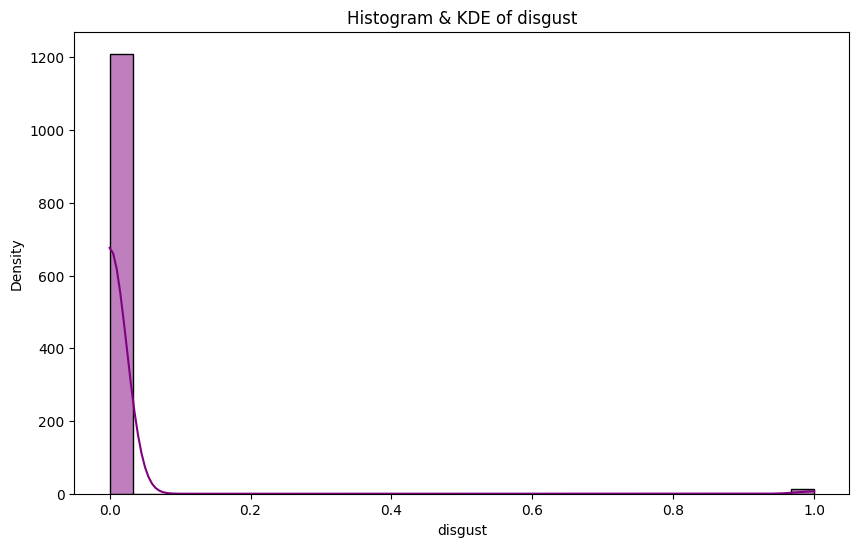

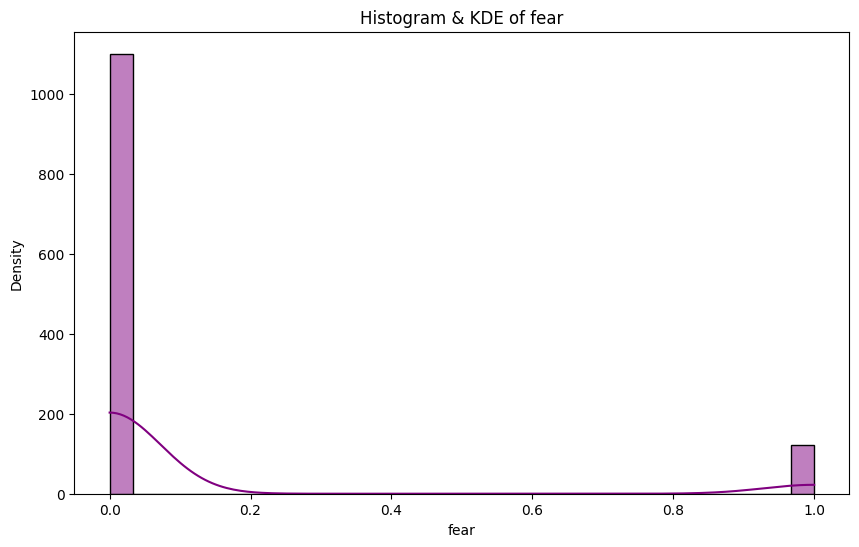

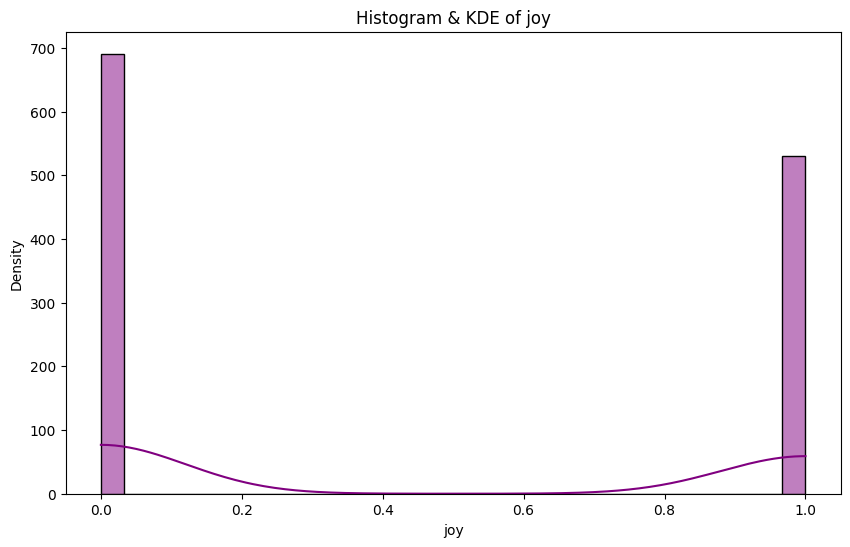

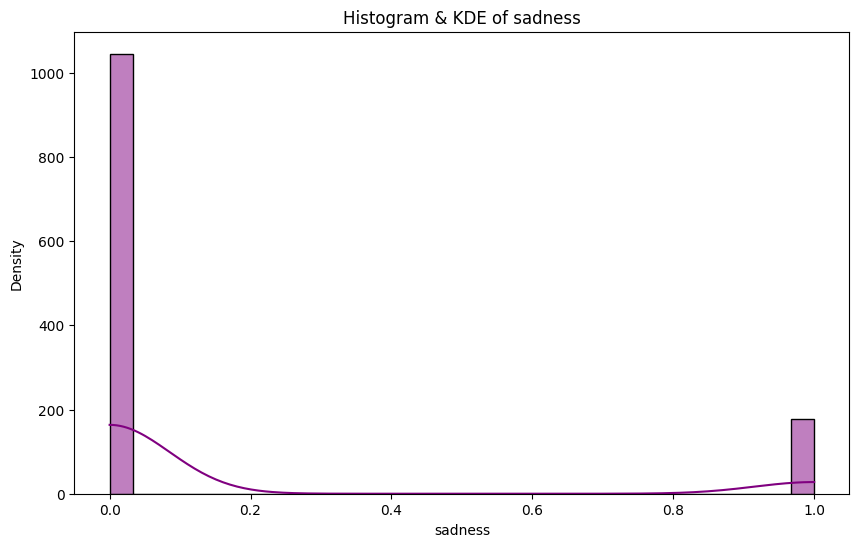

In [ ]:
# 4. Distribution and KDE for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color="purple", bins=30)
    plt.title(f"Histogram & KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# Data Augmentation with Synthetic **Data**

In [ ]:
# Data Augmentation with Synthetic Data
from nltk.corpus import wordnet
import random


In [ ]:
import nltk
from nltk.corpus import wordnet
import random

# Download the WordNet resource if not already downloaded
nltk.download('wordnet')

# Function to replace words with synonyms
def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Apply synonym replacement to the text column
data['augmented_text'] = data['text'].apply(lambda x: synonym_replacement(x, 2))
data.head()

,id,text,anger,disgust,fear,joy,sadness,augmented_text
0,afr_train_track_a_00001,Die grondeienaars het die departement genader ...,0,0,0,0,0,die grondeienaars het die departement genader ...
1,afr_train_track_a_00002,Dit is verder 'n erkende feit dat daar menings...,0,0,0,0,0,Dit is verder 'n erkende feit digital_audiotap...
2,afr_train_track_a_00003,Baie families in die Wes-Kaap is in rou gedomp...,0,0,0,0,1,Baie family in die Wes-Kaap is in rou gedompel...
3,afr_train_track_a_00004,Ons wil u deelmaak van die werk wat ons doen.,0,0,0,1,0,Ons wil uracil deelmaak van die werk wat ons d...
4,afr_train_track_a_00005,En dit onderstreep waarom NALN en NELM gesamen...,0,0,0,1,0,en dit onderstreep waarom NALN en NELM gesamen...


# **Oversampling and Undersampling**

In [ ]:
# Oversampling and Undersampling
from sklearn.utils import resample


In [ ]:
# Separate features and target
emotion_columns = ["anger", "disgust","fear",	"joy","sadness"]
data_balanced = pd.DataFrame()

for emotion in emotion_columns:
    class_data = data[data[emotion] == 1]
    balanced_class_data = resample(class_data,
                                   replace=True,
                                   n_samples=data[emotion_columns].sum().max(),
                                   random_state=42)
    data_balanced = pd.concat([data_balanced, balanced_class_data])

In [ ]:
# Display the result
print("Class distribution after balancing:")
print(data_balanced[emotion_columns].sum())

Class distribution after balancing:
anger       940
disgust     656
fear        928
joy         625
sadness    1237
dtype: int64


In [ ]:
!pip install smote-variants


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=e9e98c6a0615c13d1b8a3e40373acc894e3520196d3424791a35ec4ac10e0862
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7435 sha256=38ee2185ec554e94e62992ac0e98e83a722c4a965c9f1d76b0d3fb52764e0281
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [ ]:
# Shuffle the balanced dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
data_balanced.head()

,id,text,anger,disgust,fear,joy,sadness,augmented_text
0,afr_train_track_a_00405,"Ons kan die gulsigheid, kortsigtigheid en sorg...",1,1,0,0,0,"Ons kan die gulsigheid, kortsigtigheid en sorg..."
1,afr_train_track_a_00445,Maar dit is 'n feit dat agt miljoen mense nog ...,1,0,0,0,1,Maar dit be 'n feit digital_audiotape agt milj...
2,afr_train_track_a_01173,"Wat belangrik is, is dat die voordele van groe...",0,0,1,0,0,"Wat belangrik is, is dat die voordele avant-ga..."
3,afr_train_track_a_00952,Verlede jaar het ons die Nasionale Jeugontwikk...,0,0,0,1,0,Verlede jaar heated ons die Nasionale Jeugontw...
4,afr_train_track_a_00915,Ons is veral bekommerd oor die sinnelose gewel...,0,1,0,0,1,Ons is veral bekommerd oor die sinnelose gewel...


In [ ]:
# Advanced Preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
# Apply preprocessing
data_balanced['processed_text'] = data_balanced['text'].apply(preprocess_text)
data_balanced.head()

,id,text,anger,disgust,fear,joy,sadness,augmented_text,processed_text
0,afr_train_track_a_00405,"Ons kan die gulsigheid, kortsigtigheid en sorg...",1,1,0,0,0,"Ons kan die gulsigheid, kortsigtigheid en sorg...",ons kan die gulsigheid kortsigtigheid en sorge...
1,afr_train_track_a_00445,Maar dit is 'n feit dat agt miljoen mense nog ...,1,0,0,0,1,Maar dit be 'n feit digital_audiotape agt milj...,maar dit n feit dat agt miljoen mense nog stee...
2,afr_train_track_a_01173,"Wat belangrik is, is dat die voordele van groe...",0,0,1,0,0,"Wat belangrik is, is dat die voordele avant-ga...",wat belangrik dat die voordele van groei werks...
3,afr_train_track_a_00952,Verlede jaar het ons die Nasionale Jeugontwikk...,0,0,0,1,0,Verlede jaar heated ons die Nasionale Jeugontw...,verlede jaar het ons die nasionale jeugontwikk...
4,afr_train_track_a_00915,Ons is veral bekommerd oor die sinnelose gewel...,0,1,0,0,1,Ons is veral bekommerd oor die sinnelose gewel...,ons veral bekommerd oor die sinnelose geweld e...


In [ ]:
# Append processed_text to text column and drop processed_text
data_balanced['text'] = data_balanced['text'] + ' ' + data_balanced['processed_text']
data_balanced.drop(columns=['processed_text'], inplace=True)


In [ ]:
data_balanced.head()

,id,text,anger,disgust,fear,joy,sadness,augmented_text
0,afr_train_track_a_00405,"Ons kan die gulsigheid, kortsigtigheid en sorg...",1,1,0,0,0,"Ons kan die gulsigheid, kortsigtigheid en sorg..."
1,afr_train_track_a_00445,Maar dit is 'n feit dat agt miljoen mense nog ...,1,0,0,0,1,Maar dit be 'n feit digital_audiotape agt milj...
2,afr_train_track_a_01173,"Wat belangrik is, is dat die voordele van groe...",0,0,1,0,0,"Wat belangrik is, is dat die voordele avant-ga..."
3,afr_train_track_a_00952,Verlede jaar het ons die Nasionale Jeugontwikk...,0,0,0,1,0,Verlede jaar heated ons die Nasionale Jeugontw...
4,afr_train_track_a_00915,Ons is veral bekommerd oor die sinnelose gewel...,0,1,0,0,1,Ons is veral bekommerd oor die sinnelose gewel...


In [ ]:
# Train-Test Split
# Split the dataset into features (X) and labels (y)
X = data_balanced['text']
y = data_balanced[emotion_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display train-test split details
print(f"Number of rows in X_train: {X_train.shape[0]}")
print(f"Number of rows in X_test: {X_test.shape[0]}")
print(f"Number of rows in y_train: {y_train.shape[0]}")
print(f"Number of rows in y_test: {y_test.shape[0]}")

Number of rows in X_train: 2124
Number of rows in X_test: 531
Number of rows in y_train: 2124
Number of rows in y_test: 531


In [ ]:
print("\nColumns in y_train:")
print(y_train.columns.tolist())


Columns in y_train:
['anger', 'disgust', 'fear', 'joy', 'sadness']


In [ ]:
print("\nClass distribution in y_train:")
print(y_train.sum())


Class distribution in y_train:
anger      744
disgust    512
fear       742
joy        499
sadness    993
dtype: int64


In [ ]:
print("\nClass distribution in y_test:")
print(y_test.sum())


Class distribution in y_test:
anger      196
disgust    144
fear       186
joy        126
sadness    244
dtype: int64


In [ ]:
# Overall columns in data_balanced
print("Overall columns in the balanced dataset:")
print(data_balanced.columns.tolist())

Overall columns in the balanced dataset:
['id', 'text', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'augmented_text']


In [ ]:
# Columns in train-test split
print("\nColumns in X_train:")
print(X_train.name)  # For a single column (processed_text)

print("\nColumns in X_test:")
print(X_test.name)  # For a single column (processed_text)

print("\nColumns in y_train:")
print(y_train.columns.tolist())  # For multi-label emotion columns

print("\nColumns in y_test:")
print(y_test.columns.tolist())  # For multi-label emotion columns


Columns in X_train:
text

Columns in X_test:
text

Columns in y_train:
['anger', 'disgust', 'fear', 'joy', 'sadness']

Columns in y_test:
['anger', 'disgust', 'fear', 'joy', 'sadness']


In [ ]:
# Tokenization with Hugging Face Tokenizer
from transformers import XLMRobertaTokenizer

# Load XLM-Roberta tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

def tokenize_function(examples):
    # Tokenize the input text with padding and truncation
    return tokenizer(examples.tolist(), padding='max_length', truncation=True, max_length=128)

# Tokenize the training and testing datasets
X_train_tokens = tokenize_function(X_train)
X_test_tokens = tokenize_function(X_test)


In [ ]:
# Model Training using XLM-Roberta
from transformers import XLMRobertaForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset

import time
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score
from torch.cuda.amp import GradScaler, autocast

In [ ]:
# Convert to PyTorch tensors and prepare datasets
train_dataset = TensorDataset(
    torch.tensor(X_train_tokens['input_ids'], dtype=torch.long),
    torch.tensor(X_train_tokens['attention_mask'], dtype=torch.long),
    torch.tensor(y_train.values, dtype=torch.float)
)

test_dataset = TensorDataset(
    torch.tensor(X_test_tokens['input_ids'], dtype=torch.long),
    torch.tensor(X_test_tokens['attention_mask'], dtype=torch.long),
    torch.tensor(y_test.values, dtype=torch.float)
)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8)


In [ ]:
from transformers import XLMRobertaForSequenceClassification, XLMRobertaTokenizer
import torch
from sklearn.metrics import f1_score, accuracy_score

# Load pre-trained XLM-Roberta model and tokenizer
model_name = 'xlm-roberta-base'  # Y
tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
model = XLMRobertaForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5,
    problem_type='multi_label_classification'
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Training Loop
epochs = 5
train_losses, val_losses = [], []
train_f1_scores, val_f1_scores = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    # Training
    model.train()
    total_loss, total_f1, total_accuracy = 0, 0, 0

    for batch in train_dataloader:
        b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]

        optimizer.zero_grad()
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask,
            labels=b_labels.float()
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = (torch.sigmoid(logits) >= 0.5).cpu().numpy()
        total_f1 += f1_score(b_labels.cpu().numpy(), predictions, average='macro', zero_division=0)

        # Batch accuracy
        batch_accuracy = accuracy_score(b_labels.cpu().numpy(), predictions)
        total_accuracy += batch_accuracy

    train_losses.append(total_loss / len(train_dataloader))
    train_f1_scores.append(total_f1 / len(train_dataloader))
    train_accuracies.append(total_accuracy / len(train_dataloader))

    # Validation
    model.eval()
    val_loss, val_f1, total_val_accuracy = 0, 0, 0

    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]

            outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels.float())
            loss = outputs.loss
            logits = outputs.logits

            val_loss += loss.item()
            predictions = (torch.sigmoid(logits) >= 0.5).cpu().numpy()
            val_f1 += f1_score(b_labels.cpu().numpy(), predictions, average='macro', zero_division=0)

            # Validation accuracy
            batch_accuracy = accuracy_score(b_labels.cpu().numpy(), predictions)
            total_val_accuracy += batch_accuracy

    val_losses.append(val_loss / len(test_dataloader))
    val_f1_scores.append(val_f1 / len(test_dataloader))
    val_accuracies.append(total_val_accuracy / len(test_dataloader))

    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Training Loss: {train_losses[-1]:.4f}, Training F1: {train_f1_scores[-1]:.4f}, Training Accuracy: {train_accuracies[-1]:.4f}")
    print(f"Validation Loss: {val_losses[-1]:.4f}, Validation F1: {val_f1_scores[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.4f}")




Epoch 1/5
Training Loss: 0.5697, Training F1: 0.2155, Training Accuracy: 0.0954
Validation Loss: 0.4206, Validation F1: 0.6191, Validation Accuracy: 0.4216
Epoch 2/5
Training Loss: 0.2681, Training F1: 0.8013, Training Accuracy: 0.7025
Validation Loss: 0.1376, Validation F1: 0.8982, Validation Accuracy: 0.8924
Epoch 3/5
Training Loss: 0.1052, Training F1: 0.9129, Training Accuracy: 0.9314
Validation Loss: 0.0848, Validation F1: 0.9218, Validation Accuracy: 0.9372
Epoch 4/5
Training Loss: 0.0562, Training F1: 0.9280, Training Accuracy: 0.9742
Validation Loss: 0.0604, Validation F1: 0.9326, Validation Accuracy: 0.9596
Epoch 5/5
Training Loss: 0.0395, Training F1: 0.9309, Training Accuracy: 0.9826
Validation Loss: 0.0440, Validation F1: 0.9353, Validation Accuracy: 0.9745


In [ ]:
# Validation
model.eval()
val_loss, val_f1 = 0, 0
with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]

        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels.float())
        loss = outputs.loss
        logits = outputs.logits

        # Accumulate validation loss
        val_loss += loss.item()

        # Convert logits to binary predictions
        predictions = (torch.sigmoid(logits) >= 0.5).cpu().numpy()

        # Compute F1 score with zero_division=0
        batch_f1 = f1_score(
            b_labels.cpu().numpy(),
            predictions,
            average='macro',
            zero_division=0
        )
        val_f1 += batch_f1

# Compute average validation loss and F1 score
val_losses.append(val_loss / len(test_dataloader))
val_f1_scores.append(val_f1 / len(test_dataloader))

print(f"Epoch {epoch + 1}/{epochs}")
print(f"Training Loss: {train_losses[-1]:.4f}, Training F1: {train_f1_scores[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}, Validation F1: {val_f1_scores[-1]:.4f}")


Epoch 5/5
Training Loss: 0.0395, Training F1: 0.9309
Validation Loss: 0.0440, Validation F1: 0.9353


In [ ]:
print("Epoch | Training Loss | Validation Loss | Training F1 | Validation F1")
for epoch in range(len(train_losses)):
    print(f"{epoch + 1:5} | {train_losses[epoch]:13.4f} | {val_losses[epoch]:15.4f} | {train_f1_scores[epoch]:11.4f} | {val_f1_scores[epoch]:12.4f}")


Epoch | Training Loss | Validation Loss | Training F1 | Validation F1
    1 |        0.5697 |          0.4206 |      0.2155 |       0.6191
    2 |        0.2681 |          0.1376 |      0.8013 |       0.8982
    3 |        0.1052 |          0.0848 |      0.9129 |       0.9218
    4 |        0.0562 |          0.0604 |      0.9280 |       0.9326
    5 |        0.0395 |          0.0440 |      0.9309 |       0.9353


In [ ]:
# Final Evaluation on Test Data
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]
        outputs = model(b_input_ids, attention_mask=b_attention_mask)
        logits = outputs.logits

        # Select the emotion with the highest probability for each sentence
        predicted_emotions = torch.argmax(torch.sigmoid(logits), dim=1).cpu().numpy()
        predictions.extend(predicted_emotions)
        true_labels.extend(torch.argmax(b_labels, dim=1).cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Print evaluation metrics
from sklearn.metrics import accuracy_score, f1_score

print("Test Accuracy:", accuracy_score(true_labels, predictions))
print("Test Precision:", f1_score(true_labels, predictions, average='macro', zero_division=0))
print("Test Recall:", f1_score(true_labels, predictions, average='micro', zero_division=0))
print("Test F1 Score:", f1_score(true_labels, predictions, average='macro'))


Test Accuracy: 0.6817325800376648
Test Precision: 0.6512581673823997
Test Recall: 0.6817325800376648
Test F1 Score: 0.6512581673823997


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Save the trained model
model_save_path = "/content/Model"  # Specify directory for saving
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)
print(f"Model and tokenizer saved to {model_save_path}")


Model and tokenizer saved to /content/Model


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Load the saved model and tokenizer
model_load_path = "/content/Model"  # Adjust the path accordingly
model = RobertaForSequenceClassification.from_pretrained(model_load_path)
tokenizer = RobertaTokenizer.from_pretrained(model_load_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Function to predict emotions for each text
def predict_emotions(texts):
    predictions = []
    with torch.no_grad():
        for text in texts:
            encoded = tokenizer(
                text,
                padding="max_length",
                truncation=True,
                max_length=128,
                return_tensors="pt",
            )
            input_ids = encoded["input_ids"].to(device)
            attention_mask = encoded["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probs = torch.sigmoid(logits).cpu().numpy()

            # Identify the highest probability emotion
            max_index = probs.argmax()
            # Create a binary array with 1 for the predicted emotion and 0 for others
            binary_predictions = [0] * 5
            binary_predictions[max_index] = 1
            predictions.append(binary_predictions)
    return predictions

# Load the CSV file to predict
input_file = "/content/drive/MyDrive/public_data/dev/track_a/eng_a.csv"  # Replace with the actual path
dev_data = pd.read_csv(input_file)

# Predict emotions and update the dataframe
dev_data["predictions"] = predict_emotions(dev_data["text"])

# Prepare the output CSV with the format as per the requirements
submission = pd.DataFrame({
    "id": dev_data["id"],
    "text": dev_data["text"],
    "Anger": [pred[0] for pred in dev_data["predictions"]],
    "Fear": [pred[1] for pred in dev_data["predictions"]],
    "Joy": [pred[2] for pred in dev_data["predictions"]],
    "Sadness": [pred[3] for pred in dev_data["predictions"]],
    "Surprise": [pred[4] for pred in dev_data["predictions"]],
})

# Save the updated CSV file
output_file = "predictions_output.csv"  # Adjust the output file name as needed
submission.to_csv(output_file, index=False)

print(f"Prediction file saved as {output_file}")


You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLMRobertaTokenizer'. 
The class this function is called from is 'RobertaTokenizer'.


TypeError: expected str, bytes or os.PathLike object, not NoneType